# Generating ROCs

## 1)
### a)
![](hw4_1a.jpg)
From lambda 0 to 3, only the PDF of H0 is hit so only PFA decreases. At lambdas 3 to 7, the entire PDF of H1 is gone through, while the PDF of H0 still has a bit to go, thus PD goes from 1 to zero and PFA only goes down slightly. Then from lambdas 7 to 10, the PFA approaches zero. 
### b)
![](hw4_2b.jpg)
From lambda 0 to 1, the rate of PD and PFA decreasing is the same, then PFA falls drastically to 0 from lambda 1 to 4 while PD decreases by a lesser magnitude. Then from lambda 4 to 10, the PD approaches zero
## 2)
### a)
![](hw4_2a.jpg)
The ROC shows the PD falling almost all the way to zero and then PFA going to zero. This means that the PDF of H1 should be concentrated at lambdas less than the lambdas where H0 are concentrated. There is slight overlap in the two curves because the ROC shows a curve in the bottom right corner, signifying that at some point, the PD and PFA are decreasing simultaneously.
### b)
![](hw4_2b.jpg)
The ROC shows that PFA is falling a bit and then PD goes all the way down to zero. Both PD and PFA hit 0.5 at the same time so I can assume that the two curves have the same mean. Since PD falls so quickly in the mid-lambdas, we can assume that the PDF of H1 is very skinny and tall, while the PDF of H0 is short and wide.
## 3)
### a)
We can shift the PDF of H0 to the right, and shift the PDF of H1 to the left
### b)
![](hw4_3a.jpg)
### c)
We can standardize the distributions of the two PDFs to have the same standard deviation.
### d)
![](hw4_3c.jpg)


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
smalldata = pd.read_csv("smallData.csv",header=None)
bigdata = pd.read_csv("bigData.csv",header=None)
lognormaldata = pd.read_csv("logNormalData.csv",header=None)
moderatedata = pd.read_csv("moderateData.csv",header=None)

def getH0H1(df):
    H0 = df[df[0]==0][1]
    H1 = df[df[0]==1][1]
    return H0,H1

def plotROC(pd,pfa,title):
    fig,ax = plt.subplots()
    ax.plot(pfa,pd)
    ax.set_xlabel("P_fa")
    ax.set_ylabel("P_d")
    ax.set_title(title)
    plt.show()


In [42]:
# ROC approaches

# each data point is a threshold
def A1(data):
    H0s,H1s = getH0H1(data)
    sorteddata = data.sort_values(1)
    totalh0 = H0s.shape[0]
    totalh1 = H1s.shape[0]
    h0cnt = 0
    h1cnt = 0

    pd = []
    pfa = []
    for truth, x in zip(sorteddata[0], sorteddata[1]):
        if truth == 0:
            h0cnt += 1           
        elif truth == 1:
            h1cnt += 1
        pfa.append((totalh0-h0cnt)/totalh0)
        pd.append((totalh1-h1cnt)/totalh1)
    return pd,pfa    

# 101 linear spaced from max to min
def A2(data):
    n = 101

    H0s,H1s = getH0H1(data)
    sorteddata = data.sort_values(1)
    minlambda = sorteddata.iloc[0][1]
    maxlambda = sorteddata.iloc[-1][1]

    lambdas = np.linspace(minlambda,maxlambda,n)

    totalh0 = H0s.shape[0]
    totalh1 = H1s.shape[0]
    h0cnt = 0
    h1cnt = 0

    pd = []
    pfa = []

    iterabledata = list(zip(sorteddata[0], sorteddata[1]))
    dataidx = 0
    for l in lambdas:
        pfa.append((totalh0-h0cnt)/totalh0)
        pd.append((totalh1-h1cnt)/totalh1)

        while iterabledata[dataidx][1] < l:
            if iterabledata[dataidx][0] == 0:
                h0cnt += 1           
            else:
                h1cnt += 1
            dataidx += 1
    pd.append((totalh1-h1cnt)/totalh1)
    pfa.append((totalh0-h0cnt)/totalh0)
        
    return pd,pfa    

# 101 evenly spaced data points
def A3(data):
    H0s,H1s = getH0H1(data)
    sorteddata = data.sort_values(1)
    n = max(1,sorteddata.shape[0] // 101)

    totalh0 = H0s.shape[0]
    totalh1 = H1s.shape[0]
    h0cnt = 0
    h1cnt = 0

    pd = []
    pfa = []
    wait = 1
    for truth, x in zip(sorteddata[0], sorteddata[1]):
        if truth == 0:
            h0cnt += 1           
        else:
            h1cnt += 1
    
    
        if wait == 1:
            pfa.append((totalh0-h0cnt)/totalh0)
            pd.append((totalh1-h1cnt)/totalh1)
            wait = n
        else:
            wait -= 1
        
    pd.append((totalh1-h1cnt)/totalh1)
    pfa.append((totalh0-h0cnt)/totalh0)
        
    return pd,pfa

# 101 samples of FA
def A4(data):
    H0s,H1s = getH0H1(data)
    sorteddata = data.sort_values(1)

    totalh0 = H0s.shape[0]
    totalh1 = H1s.shape[0]
    h0cnt = 0
    h1cnt = 0

    dataidx = sorteddata.shape[0]-1
    iterabledata = list(zip(sorteddata[0], sorteddata[1]))

    pfa = [i/100 for i in range(0,101)]
    pd = []
    for i in pfa:
        h0needed = int(i*totalh0)

        while h0needed-h0cnt > 0:
            truth, lambdaa = iterabledata[dataidx]
            if truth == 0:
                h0cnt += 1
            else:
                h1cnt += 1
            dataidx -= 1
        pd.append(h1cnt/totalh1)
        # pfa.append((totalh0-h0cnt)/totalh0)
        # pd.append((totalh1-h1cnt)/totalh1)
    return pd,pfa   

def makeROCs(data):
    pd,pfa = A1(data)
    plotROC(pd,pfa,"A1")

    pd,pfa = A2(data)
    plotROC(pd,pfa,"A2")

    pd,pfa = A3(data)
    plotROC(pd,pfa,"A3")

    pd,pfa = A4(data)
    plotROC(pd,pfa,"A4")

## 4)

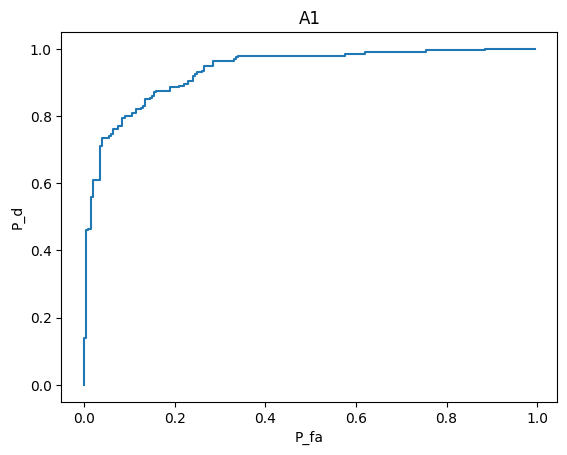

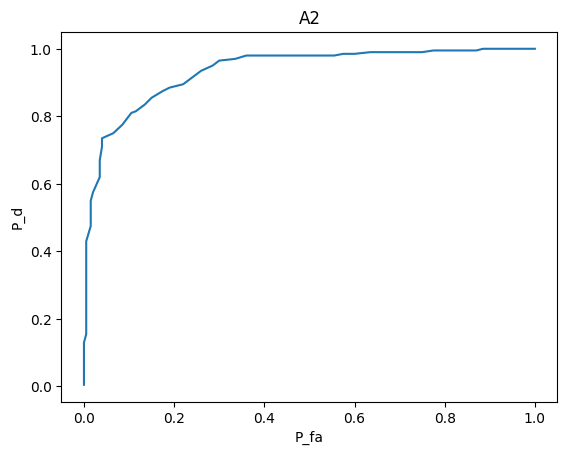

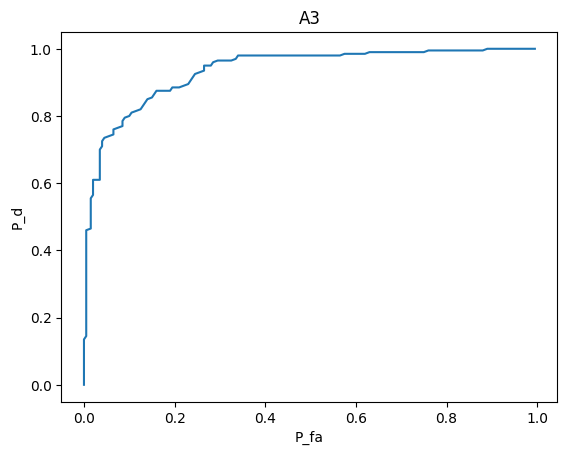

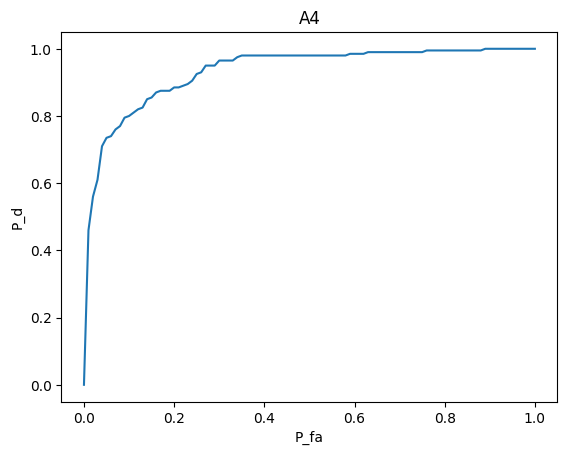

In [7]:
makeROCs(moderatedata)

### a) 
I think all of the approaches work. None of the approaches have moments where one of $P_{FA}$ and $P_{D}$ decreases while the other increases.
### b) 
None of the approaches are inappropriate since none of the approaches have moments where one of $P_{FA}$ and $P_{D}$ decreases while the other increases 


## 5)

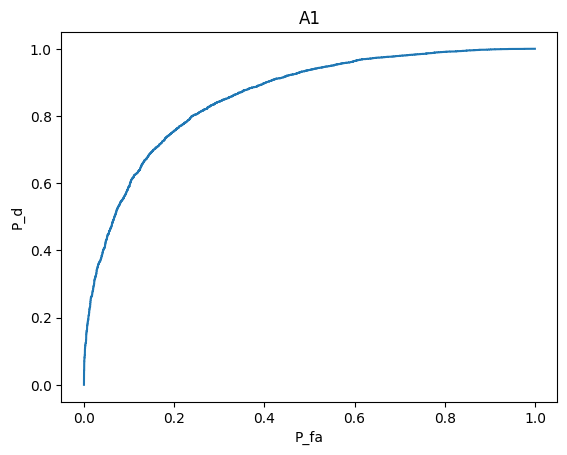

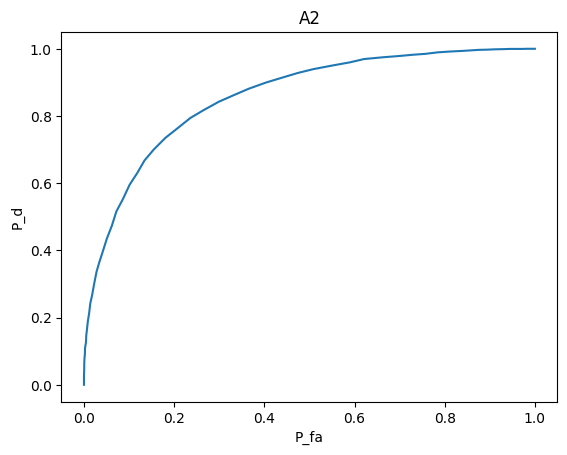

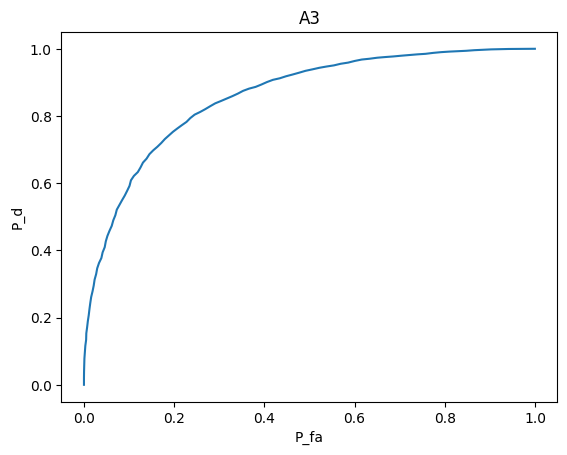

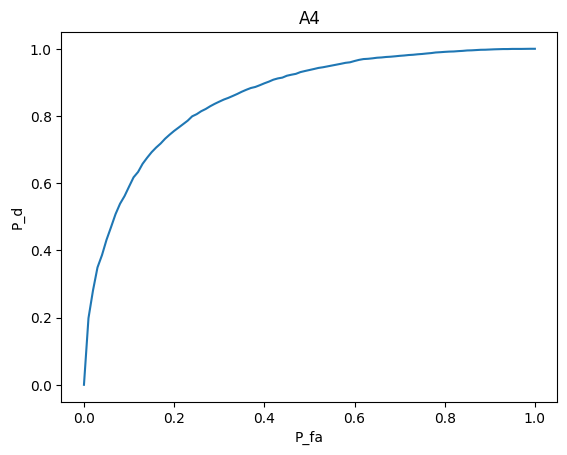

In [8]:
makeROCs(bigdata)

### a) 
I think all of the approaches work. None of the approaches have moments where one of $P_{FA}$ and $P_{D}$ decreases while the other increases.
### b) 
None of the approaches are inappropriate since none of the approaches have moments where one of $P_{FA}$ and $P_{D}$ decreases while the other increases 


## 6)

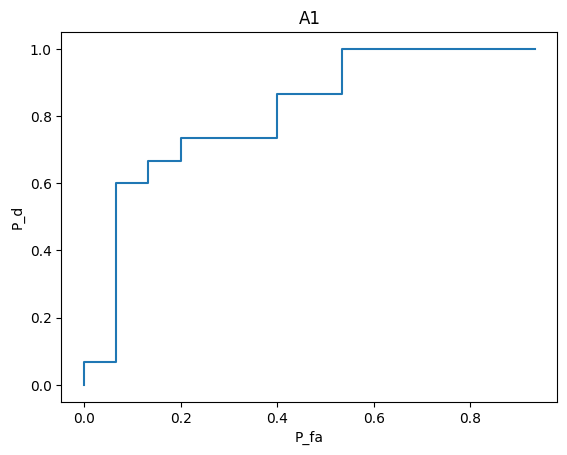

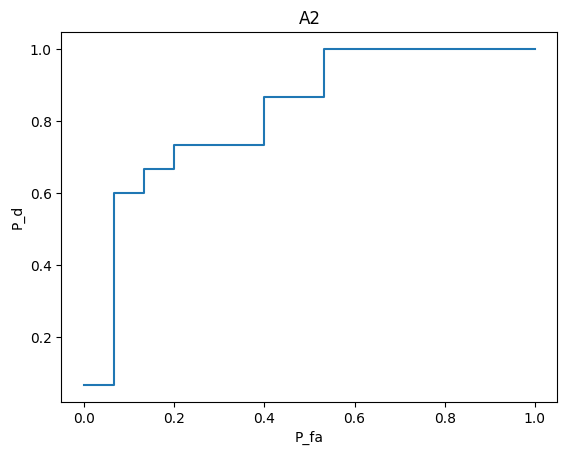

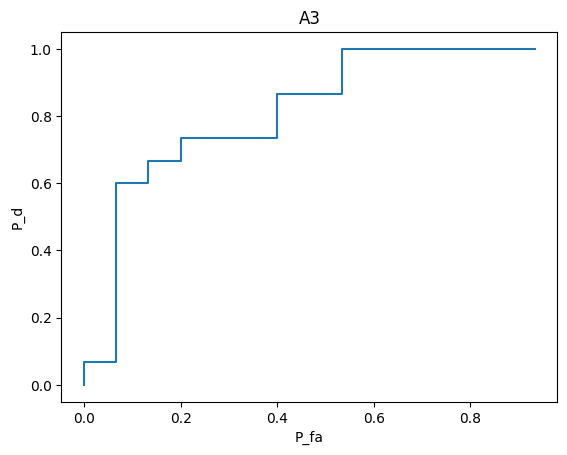

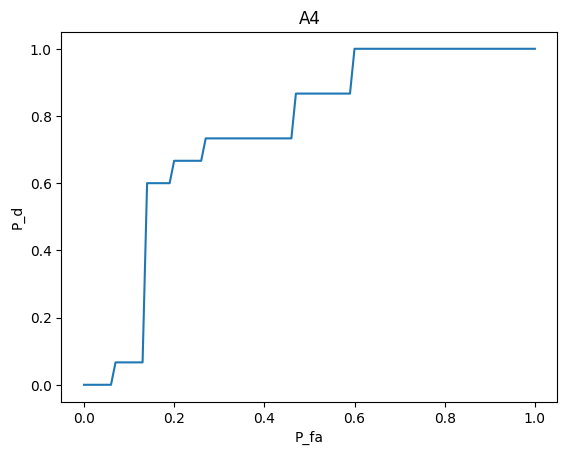

In [9]:
makeROCs(smalldata)

### a) 
I think all of the approaches work. None of the approaches have moments where one of $P_{FA}$ and $P_{D}$ decreases while the other increases.
### b) 
None of the approaches are inappropriate since none of the approaches have moments where one of $P_{FA}$ and $P_{D}$ decreases while the other increases 


## 7)

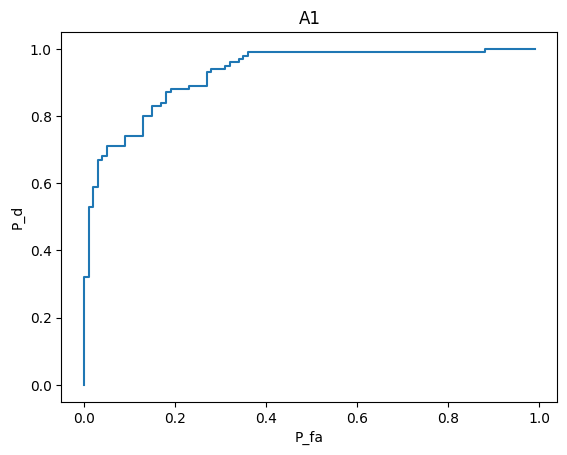

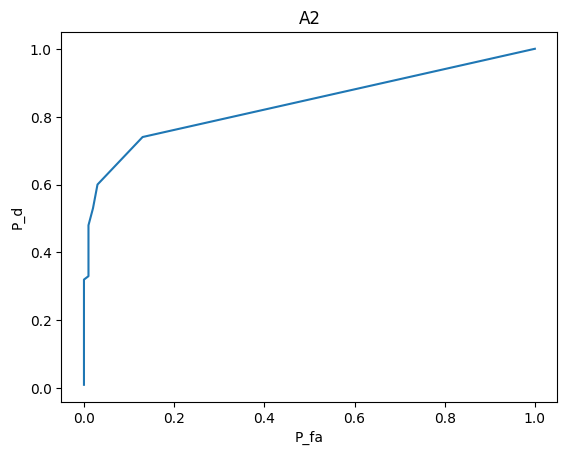

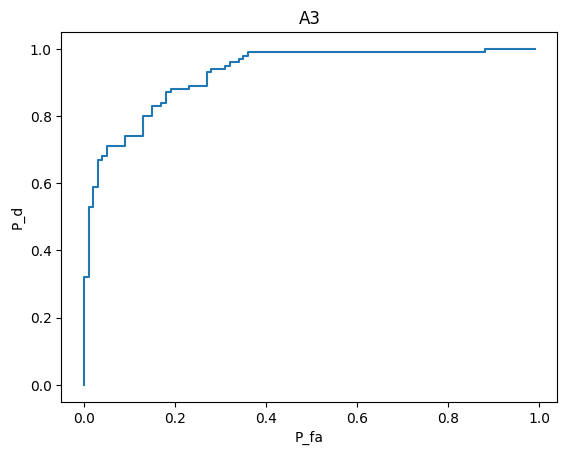

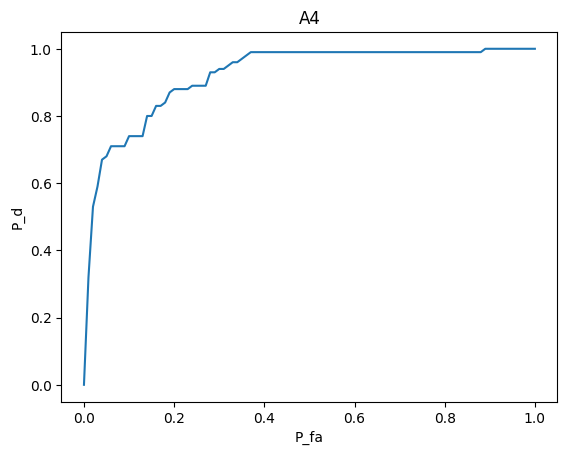

In [43]:
makeROCs(lognormaldata)
pd,pfa = A2(lognormaldata)

### a) 
I think all of the approaches work except for Approach 2. None of the approaches have moments where one of $P_{FA}$ and $P_{D}$ decreases while the other increases. They also all generally show the same thing which is that $P_{D}$ stays near perfect at the start before gradually decreasing to about 40% before dropping to zero.
### b) 
Approach 2 is inappropriate because the ROC produced has a diagonal line from (1,1) to about (0.2,0.8). This is caused by Approach 2 using equally spaced samples from the range of the data. The range of the log normal data is very large (making each step very large) but most of the data points are concentrated towards the smaller numbers. Thus, after the early steps, the number of false alarms drastically decreases per step, causing the large diagonal line.


## 8)
Approach 1 works by using each decision statistic as a data point. I think this will only be universally applicable for moderate to small amounts of data. When there is a lot of data, calculating the PD and PFA for each threshold will be unnecessarily compuationally intensive.

Approach 2 works by taking 101 linearly spaced points between the max and min decision statistic. I think this will only work for data that is evenly spaced within the max and min dcision statistic. As seen with the log normal data, when most of the data is concentrated in a certain range, the ROC doesn't get generated well.

Approach 3 works by taking 101 evenly spaced apart decision statistics. I think this approach will be universally applicable as it was able to produce ROCs for small, moderate, large, and log normal data sets.

Approach 4 works by taking 101 evenly spaced PFAs and then finding the decision statistic that results in that PFA before calculating PD. I think this approach is also universally applicable as it was also able to produce ROCs for small, moderate, large, and log normal data sets. 


# MP Check-in

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
from scipy import signal
from sklearn.linear_model import Lasso

# load image
K = 8
P, Q = (K,K)
lambdas = np.logspace(-7, 2, 10)
M = 20

# basis vector matrix
def basis(u, v, x, y, P, Q):
    alpha = np.sqrt(1/P) if u == 0 else np.sqrt(2/P)
    beta = np.sqrt(1/Q) if v == 0 else np.sqrt(2/Q)
    return alpha*beta*math.cos(math.pi*(2*x-1)*(u-1)/(2*P))*math.cos(math.pi*(2*y-1)*(v-1)/(2*P))

def getBasisChip(imgShape, u,v):
    P, Q = imgShape
    img = np.zeros((P,Q))

    # change x and y to be 1-indexed
    # go down by columns
    for y in range(1,Q+1):
        for x in range(1,P+1):
            img[y-1][x-1] = basis(u, v, x, y, P, Q)
    return img

def getBasisVectorMatrix():
    basisVectorMatrix = np.zeros(((P*Q)*(P*Q)))
    i = 0
    for x in range(1,P+1):
        for y in range(1,Q+1):
            for v in range(1,Q+1):
                for u in range(1,P+1):
                    basisVectorMatrix[i] = basis(u, v, x, y, P, Q)
                    i += 1

    basisVectorMatrix = basisVectorMatrix.reshape((P*Q),(P*Q))
    return basisVectorMatrix

def makeTrainTestImg(src, s, m):
    totalPixels = src.shape[0] * src.shape[1] 
    trainimg = np.full((src.shape[0],src.shape[1]), np.NaN)
    testimg = np.full((src.shape[0],src.shape[1]), np.NaN)
    fullimg = np.full((src.shape[0],src.shape[1]), np.NaN)

    idx_to_keep = np.random.choice(totalPixels,s, replace=False)

    for i in idx_to_keep[m:]:
        x = i // 8
        y = i-(x*8)
        trainimg[x][y] = src[x][y]
        fullimg[x][y] = src[x][y]

    for i in idx_to_keep[:m]:
        x = i // 8
        y = i-(x*8)
        testimg[x][y] = src[x][y]
        fullimg[x][y] = src[x][y]

    return trainimg, testimg, fullimg

def createUnderdeterminedSystem(chip, basisVectorMatrix):
    sensed_idx= ~np.isnan(chip)
    chip_noNan = chip[sensed_idx]

    underdeterminedBVM = np.zeros((chip_noNan.shape[0],basisVectorMatrix.shape[1]))
    i = 0
    P2 = sensed_idx.shape[0]
    Q2 = sensed_idx.shape[1]
    for x in range(P2):
        for y in range(Q2):
            if sensed_idx[x][y]:
                underdeterminedBVM[i] = basisVectorMatrix[x*P2 + y]
                i+=1
    return underdeterminedBVM, chip_noNan




def CrossvalidateLambda(chip, basisVectorMatrix, s, plot=False):
    if plot:
        fig, ax = plt.subplots()
        ax.set_xscale("log")
        ax.set_title("MSE vs log(lambda)")
        ax.set_xlabel("log(lambda)")
        ax.set_ylabel("MSE")

    avgMSEs = []
    for fold in range(M):
        chip_train, chip_test, chip_full  = makeTrainTestImg(chip, s, s//6)

        chip_train_BVM, chip_train_noNAN = createUnderdeterminedSystem(chip_train, basisVectorMatrix)

        # print(chip_train_BVM.shape, chip_train_noNAN.shape)
        # print()

        MSEs = []
        for l in lambdas:
            model = Lasso(l).fit(chip_train_BVM, chip_train_noNAN)
            # weights = np.reshape(model.coef_, (model.coef_.shape[0],1))
            pred_chip = np.reshape(model.predict(basisVectorMatrix), (P,Q))

            # calc mse only with test chip
            sensed_idx= ~np.isnan(chip_test)
            chip_test_noNan = chip_test[sensed_idx]
            pred_chip_test_noNan = pred_chip[sensed_idx]

            MSEs.append(np.mean((chip_test_noNan-pred_chip_test_noNan)**2))
        # plot one fold's worth of MSEs
        avgMSEs.append(MSEs)

        if plot:
            ax.plot(lambdas, MSEs, linestyle="--",alpha=0.5)

    # plot avg over all the folds
    avgMSEs = np.mean(avgMSEs, axis=0)
    optimalLambda = lambdas[np.argmin(avgMSEs)]
    if plot:
        ax.plot(lambdas, avgMSEs,c="black",label="Average MSE")
        ax.axvline(optimalLambda, label=f"Optimal Lambda ({optimalLambda})")
        ax.legend()
        plt.show()
    return optimalLambda
# CrossvalidateLambda(my_chip, plot=True)

def reconstruct_chip(original_chip, corrupted_chip, s, plot=False):
    basisVectorMatrix = getBasisVectorMatrix()
    optimalLambda = CrossvalidateLambda(original_chip, basisVectorMatrix, s, plot=plot)
    chip_BVM, chip_noNAN = createUnderdeterminedSystem(corrupted_chip, basisVectorMatrix)
    model = Lasso(optimalLambda).fit(chip_BVM, chip_noNAN)
    weights = np.reshape(model.coef_, (model.coef_.shape[0],1))
    pred_chip = np.reshape(model.predict(basisVectorMatrix), (P,Q))

    mse = np.mean((original_chip-pred_chip)**2)/(original_chip.shape[0]*original_chip.shape[1])
    if plot:
        fig, ax = plt.subplots(1,3)
        ax[0].imshow(corrupted_chip, cmap='gray')
        ax[0].set_title(f"corrupted image")
        ax[1].imshow(pred_chip, cmap='gray')
        ax[1].set_title(f"predicted chip \ns=30 mse={mse.round(2)}")
        ax[2].stem(weights)
        ax[2].set_title(f"weights \nlambda={optimalLambda}")
        plt.show()
    return pred_chip

def corruptImg(img, s, plot=False):    
    corrupted_img = np.full((img.shape[0],img.shape[1]), np.NaN)
    for x in range(0,img.shape[0],8):
        for y in range(0,img.shape[1],K):
            chip = img[x:x+K,y:y+K]
            _, _, chip_full  = makeTrainTestImg(chip, s, s//6)
            corrupted_img[x:x+K,y:y+K] = chip_full
    if plot:
        fig,ax = plt.subplots()
        ax.imshow(corrupted_img, cmap='gray')
        ax.set_title("corrupted image")
        plt.show()
    return corrupted_img
    

def reconstruct_img(img, s, plot=False):  
    print("s:",s)
    corrupted_img = corruptImg(img, s, plot=True)
    reconstructed_img = np.full((corrupted_img.shape[0],corrupted_img.shape[1]), np.NaN)
    for x in range(0,img.shape[0],8):
        for y in range(0,img.shape[1],K):
            chip = corrupted_img[x:x+K,y:y+K]
            original_chip = img[x:x+K,y:y+K]
            pred_chip = reconstruct_chip(original_chip, chip, s)
            reconstructed_img[x:x+K,y:y+K] = pred_chip
    mse = np.mean((img-reconstructed_img)**2)/(img.shape[0]*img.shape[1])

    if plot:
        fig,ax = plt.subplots()
        ax.imshow(reconstructed_img, cmap='gray')
        ax.set_title(f"reconstructed image mse:{mse}")
        plt.show()
    return reconstructed_img

boat = np.asarray(Image.open('fishing_boat.bmp'), dtype=np.float64)
fig,ax = plt.subplots()
ax.imshow(boat, cmap='gray')
ax.set_title("original image")
plt.show()

savedImgs = {}
for s in [10,20,30,40,50]:
    reconstructed_img = reconstruct_img(boat, s, plot=True)
    savedImgs[s] = reconstructed_img

## a)

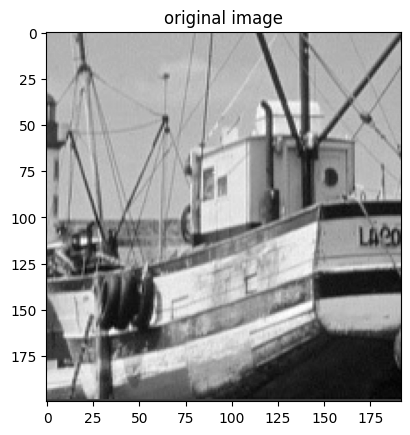

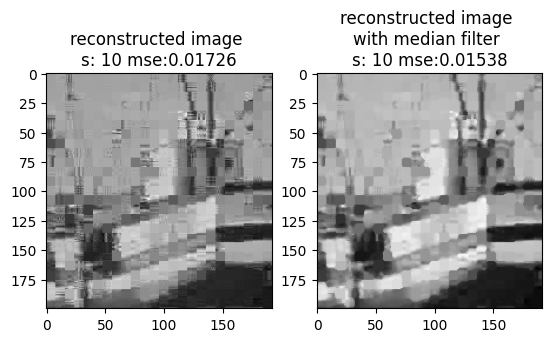

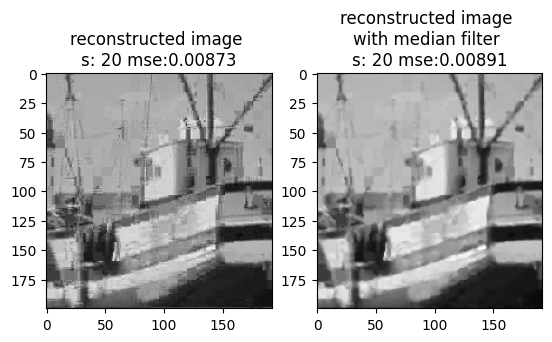

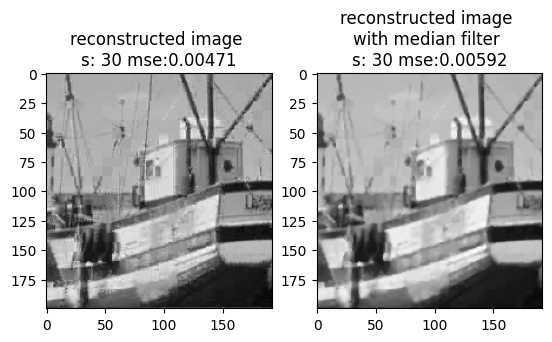

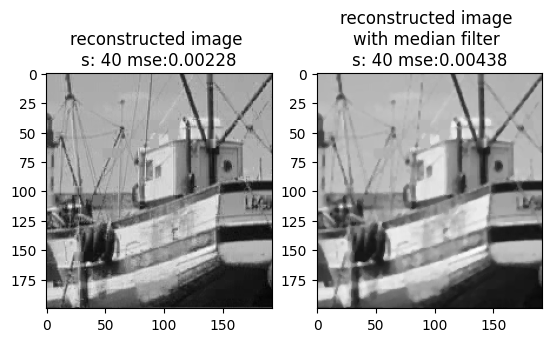

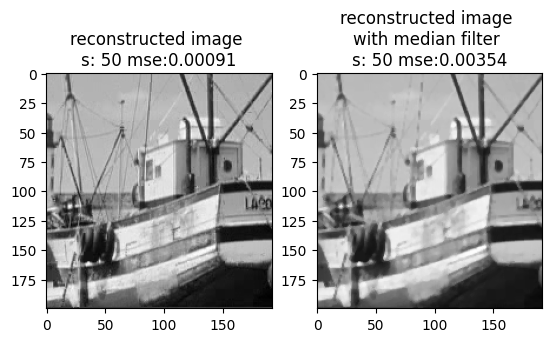

In [35]:
def addMedianFilter(original_img, reconstructed_img, plot=False):
    reconstructed_img_medfilt = signal.medfilt2d(reconstructed_img, kernel_size=3)
    if plot:
        mse = np.mean((original_img-reconstructed_img_medfilt)**2)/(original_img.shape[0]*original_img.shape[1])
        fig,ax = plt.subplots()
        ax.imshow(reconstructed_img_medfilt, cmap='gray')
        ax.set_title(f"reconstructed image with median filtering mse:{mse}")
        plt.show()
    return reconstructed_img_medfilt

boat = np.asarray(Image.open('fishing_boat.bmp'), dtype=np.float64)
fig,ax = plt.subplots()
ax.imshow(boat, cmap='gray')
ax.set_title("original image")
plt.show()

for k,reconstructed_img in savedImgs.items():
    mse = np.mean((boat-reconstructed_img)**2)/(boat.shape[0]*boat.shape[1])
    reconstructed_img_median = addMedianFilter(boat, reconstructed_img)
    mse_median = np.mean((boat-reconstructed_img_median)**2)/(boat.shape[0]*boat.shape[1])

    fig,ax = plt.subplots(1,2)
    ax[0].imshow(reconstructed_img, cmap='gray')
    ax[0].set_title(f"reconstructed image \ns: {k} mse:{round(mse,5)}")
    ax[1].imshow(reconstructed_img_median, cmap='gray')
    ax[1].set_title(f"reconstructed image \nwith median filter \ns: {k} mse:{round(mse_median,5)}")
    plt.show()

## b)

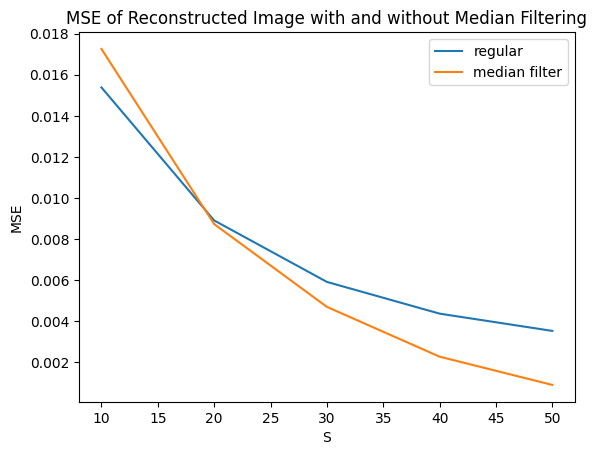

In [38]:
medianMSE = []
nomedianMSE = []
x = list(savedImgs.keys())
for k,reconstructed_img in savedImgs.items():
    mse = np.mean((boat-reconstructed_img)**2)/(boat.shape[0]*boat.shape[1])
    reconstructed_img_median = addMedianFilter(boat, reconstructed_img)
    mse_median = np.mean((boat-reconstructed_img_median)**2)/(boat.shape[0]*boat.shape[1])

    medianMSE.append(mse)
    nomedianMSE.append(mse_median)

fig, ax = plt.subplots()
ax.plot(x,nomedianMSE,label="regular")
ax.plot(x,medianMSE,label="median filter")

ax.set_ylabel("MSE")
ax.set_xlabel("S")
ax.set_title("MSE of Reconstructed Image with and without Median Filtering")
ax.legend()
plt.show()